In [1]:
import numpy as np
import csv
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)

In [2]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier

In [4]:
file_path= os.path.expanduser('~/EE219/hw4/network_backup_dataset.csv')

In [9]:
def day_of_week_num(days):
    convert = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    
    num = []
    for i in range(0, len(days)):
        num.append(convert[days[i]])
    return num

# Dataset 1

In [6]:
df=pd.read_csv(file_path, sep=',',header='infer')

In [5]:
print("index by column names: one column\n", df.loc[0,'File Name'])

index by column names: one column
 File_0


In [6]:
df['day_number'] = 7*(df['Week #'] - 1) + day_of_week_num(df['Day of Week'])

In [7]:
twenty_day_period = df[df['day_number'] <=20]  

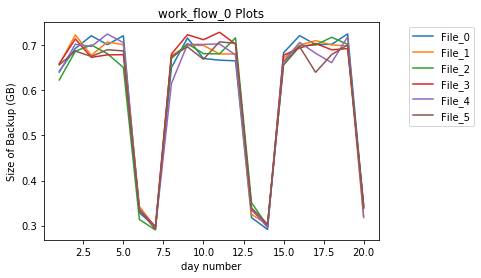

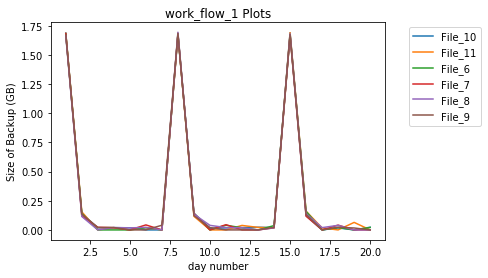

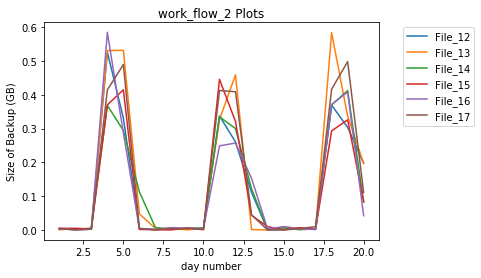

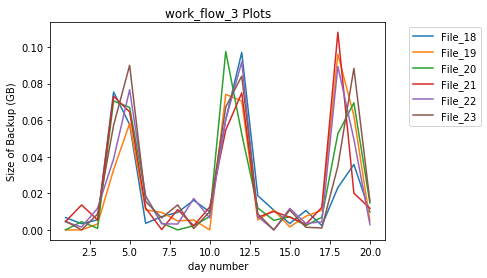

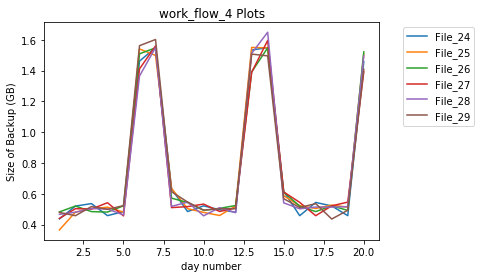

In [31]:
for wfID, wfGroup in twenty_day_period.groupby('Work-Flow-ID'):
    plt.figure()
    plt.title('%s Plots' % wfID)
    plt.xlabel('day number')
    plt.ylabel('Size of Backup (GB)')
    for fID, fGroup in wfGroup.groupby('File Name'):
        sum_one_day = fGroup.groupby('day_number').sum()
        plt.plot(range(1,21,1), sum_one_day['Size of Backup (GB)'], label=fID)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

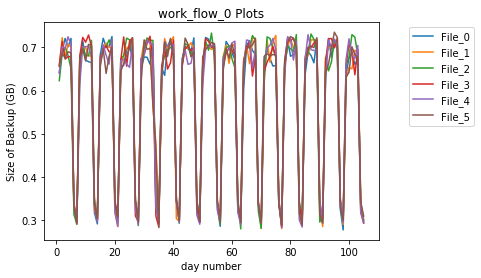

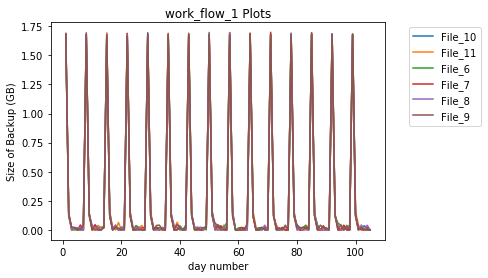

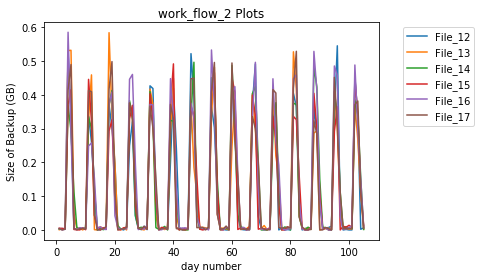

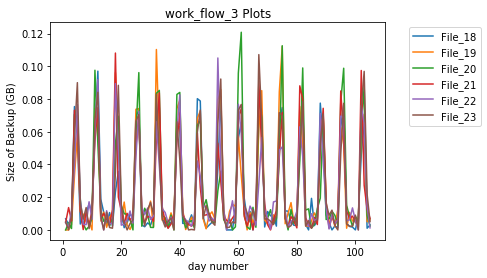

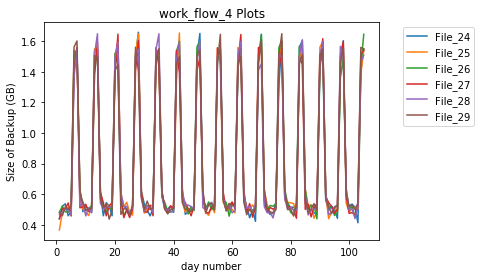

In [32]:
for wfID, wfGroup in df.groupby('Work-Flow-ID'):
    plt.figure()
    plt.title('%s Plots' % wfID)
    plt.xlabel('day number')
    plt.ylabel('Size of Backup (GB)')
    for fID, fGroup in wfGroup.groupby('File Name'):
        sum_one_day = fGroup.groupby('day_number').sum()
        plt.plot(range(1,106,1), sum_one_day['Size of Backup (GB)'], label=fID)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Section 2

In [10]:
df=pd.read_csv(file_path, sep=',',header='infer')
def trim_by_last_num(id):    
    num = []
    for i in range(0, len(id)):
        mystr=id[i]
        myst=mystr[-2:]
        if myst[0]=='_':
            myst=mystr[-1:]
        num.append(myst)
    return num
#df['Day of Week'] = 7*(df['Week #'] - 1) + day_of_week_num(df['Day of Week'])
df['Day of Week'] = day_of_week_num(df['Day of Week'])
df['Work-Flow-ID'] = trim_by_last_num(df['Work-Flow-ID'])
df['File Name'] = trim_by_last_num(df['File Name'])
df_y=df['Size of Backup (GB)']
df=df.drop(['Size of Backup (GB)','Backup Time (hour)'], axis = 1)
kf = KFold(n_splits=10,random_state=42,shuffle=True)

In [10]:
df.head()

,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name
0,1,1,1,0,0
1,1,1,1,2,12
2,1,1,1,2,13
3,1,1,1,2,14
4,1,1,1,2,16


# Linear Regression model

In [11]:
RMSE_train=[]
RMSE_test=[]
for train_index, test_index in kf.split(df):
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
    RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
print('RMSE for train data=',mean(RMSE_train))
print('RMSE for test data=',mean(RMSE_test))

RMSE for train data= 0.1035849926354248
RMSE for test data= 0.10342695948027075


Text(0.5, 0, 'fitted valuse')

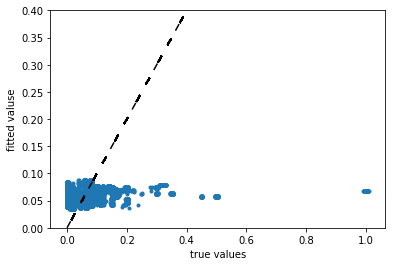

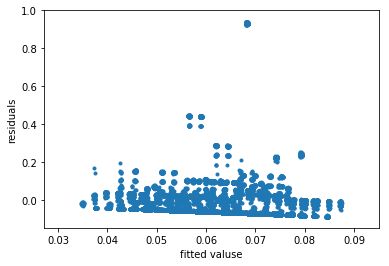

In [151]:
reg = LinearRegression().fit(df, df_y)
pred= reg.predict(df)
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.xlabel('true values')
plt.ylabel('fitted valuse')
plt.ylim(0, 0.4) 

plt.figure()
plt.scatter(pred,df_y-pred, marker='.')
plt.ylabel('residuals')
plt.xlabel('fitted valuse')

# Random Forest 

In [22]:
MSE_train=[]
MSE_test=[]
oob_error=[]
total_train=0
total_test=0
for train_index, test_index in kf.split(df):
#     print('length for index=',len(train_index))
    X_train= df.loc[train_index]
    y_train= df_y.loc[train_index]
    X_test= df.loc[test_index]
    y_test= df_y.loc[test_index]
    reg = RandomForestRegressor(oob_score=True,n_estimators=20,max_depth=4, bootstrap=True,max_features=5,random_state=42)
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
    oob_error.append(1 - reg.oob_score_)
    MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
    MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
    total_train=total_train+len(train_index)
    total_test=total_test+len(test_index)
print('oob=',mean(oob_error))
print('RMSE for train data=',np.sqrt(sum(MSE_train)/total_train))
print('RMSE for test data=',np.sqrt(sum(MSE_test)/total_test))

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

oob= 0.34068290398038625
RMSE for train data= 0.06057644021604171
RMSE for test data= 0.060818417054469116


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [24]:
avg_RMSE=np.zeros((101,5,2))
oob=np.zeros((101,5))
for tree_num in range(1,202,2):
    for feature_num in range(1,6):
        MSE_train=[]
        MSE_test=[]
        oob_error=[]
        total_train=0
        total_test=0
        for train_index, test_index in kf.split(df):
            X_train= df.loc[train_index]
            y_train= df_y.loc[train_index]
            X_test= df.loc[test_index]
            y_test= df_y.loc[test_index]
            reg = RandomForestRegressor(oob_score=True,n_estimators=tree_num,max_depth=4, bootstrap=True,max_features=feature_num,random_state=42)
            reg.fit(X_train,y_train)
            pred_train = reg.predict(X_train)
            pred_test = reg.predict(X_test)
            oob_error.append(1 - reg.oob_score_)
            MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
            MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
            total_train=total_train+len(train_index)
            total_test=total_test+len(test_index)
        print('tree_num=',tree_num,'feature_num=',feature_num,'oob=',mean(oob_error))
        print('tree_num=',tree_num,'feature_num=',feature_num,'RMSE for test data=',np.sqrt(sum(MSE_train)/total_train))
        print('tree_num=',tree_num,'feature_num=',feature_num,'RMSE for test data=',np.sqrt(sum(MSE_test)/total_test))
        avg_RMSE[int((tree_num-1)/2),feature_num-1,0]=np.sqrt(sum(MSE_train)/total_train)
        avg_RMSE[int((tree_num-1)/2),feature_num-1,1]=np.sqrt(sum(MSE_test)/total_test)
        oob[int((tree_num-1)/2),feature_num-1]=mean(oob_error)

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 1 oob= 1.0929443893249362
tree_num= 1 feature_num= 1 RMSE for test data= 0.08481383924683449
tree_num= 1 feature_num= 1 RMSE for test data= 0.08490785368725132


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 2 oob= 1.0673749791739455
tree_num= 1 feature_num= 2 RMSE for test data= 0.08038095196871878
tree_num= 1 feature_num= 2 RMSE for test data= 0.0805049221900028


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 3 oob= 0.9940938632699885
tree_num= 1 feature_num= 3 RMSE for test data= 0.0666628795851053
tree_num= 1 feature_num= 3 RMSE for test data= 0.066889659446144


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 4 oob= 0.9696679879308654
tree_num= 1 feature_num= 4 RMSE for test data= 0.0610696913509777
tree_num= 1 feature_num= 4 RMSE for test data= 0.06128277803829874


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 1 feature_num= 5 oob= 0.9696741599229075
tree_num= 1 feature_num= 5 RMSE for test data= 0.06106166917542773
tree_num= 1 feature_num= 5 RMSE for test data= 0.06128477090865464


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 1 oob= 0.8196435919658234
tree_num= 3 feature_num= 1 RMSE for test data= 0.07847773860351956
tree_num= 3 feature_num= 1 RMSE for test data= 0.07898185176731992


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 2 oob= 0.8029387010553238
tree_num= 3 feature_num= 2 RMSE for test data= 0.07842558250183318
tree_num= 3 feature_num= 2 RMSE for test data= 0.07875130657356404


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 3 oob= 0.680976950780892
tree_num= 3 feature_num= 3 RMSE for test data= 0.06659590816973605
tree_num= 3 feature_num= 3 RMSE for test data= 0.06708164057981757


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 4 oob= 0.6007695201374535
tree_num= 3 feature_num= 4 RMSE for test data= 0.060650353980516554
tree_num= 3 feature_num= 4 RMSE for test data= 0.06098217789848651


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 3 feature_num= 5 oob= 0.5915492894134107
tree_num= 3 feature_num= 5 RMSE for test data= 0.060226488339914556
tree_num= 3 feature_num= 5 RMSE for test data= 0.06062928613944783


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 1 oob= 0.7343195240853944
tree_num= 5 feature_num= 1 RMSE for test data= 0.08070744514807576
tree_num= 5 feature_num= 1 RMSE for test data= 0.08105318792353303


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 2 oob= 0.6344298336147233
tree_num= 5 feature_num= 2 RMSE for test data= 0.07435496040638566
tree_num= 5 feature_num= 2 RMSE for test data= 0.07469814542256872


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 3 oob= 0.5117492873189893
tree_num= 5 feature_num= 3 RMSE for test data= 0.0649620267564554
tree_num= 5 feature_num= 3 RMSE for test data= 0.06538911608945638


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 4 oob= 0.4429459628337629
tree_num= 5 feature_num= 4 RMSE for test data= 0.060546272525364986
tree_num= 5 feature_num= 4 RMSE for test data= 0.06084032930315187


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 5 feature_num= 5 oob= 0.43779700679208383
tree_num= 5 feature_num= 5 RMSE for test data= 0.06040169010188829
tree_num= 5 feature_num= 5 RMSE for test data= 0.06073448300335266


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 1 oob= 0.6590418382372378
tree_num= 7 feature_num= 1 RMSE for test data= 0.07902040013480617
tree_num= 7 feature_num= 1 RMSE for test data= 0.07944970661143266


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 2 oob= 0.496809957706995
tree_num= 7 feature_num= 2 RMSE for test data= 0.06716894282183339
tree_num= 7 feature_num= 2 RMSE for test data= 0.06744445646217957


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 3 oob= 0.4461386513050335
tree_num= 7 feature_num= 3 RMSE for test data= 0.06439709922953525
tree_num= 7 feature_num= 3 RMSE for test data= 0.06470231014951186


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 4 oob= 0.3866707634845327
tree_num= 7 feature_num= 4 RMSE for test data= 0.060750855073251654
tree_num= 7 feature_num= 4 RMSE for test data= 0.061005778872377764


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 7 feature_num= 5 oob= 0.37811509386379266
tree_num= 7 feature_num= 5 RMSE for test data= 0.0604479029166229
tree_num= 7 feature_num= 5 RMSE for test data= 0.06073015957833859


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 1 oob= 0.6436545814606167
tree_num= 9 feature_num= 1 RMSE for test data= 0.0799940771270529
tree_num= 9 feature_num= 1 RMSE for test data= 0.08043409722496864


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 2 oob= 0.48117194348419495
tree_num= 9 feature_num= 2 RMSE for test data= 0.0685650295964694
tree_num= 9 feature_num= 2 RMSE for test data= 0.06880380231078191


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 3 oob= 0.4097567188136323
tree_num= 9 feature_num= 3 RMSE for test data= 0.06343393755949021
tree_num= 9 feature_num= 3 RMSE for test data= 0.06368526881029682


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 4 oob= 0.3760010774618645
tree_num= 9 feature_num= 4 RMSE for test data= 0.061217429187627105
tree_num= 9 feature_num= 4 RMSE for test data= 0.061429595763040065


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 9 feature_num= 5 oob= 0.3575268227901047
tree_num= 9 feature_num= 5 RMSE for test data= 0.060527700766537774
tree_num= 9 feature_num= 5 RMSE for test data= 0.06075584263946666


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 1 oob= 0.60662764900208
tree_num= 11 feature_num= 1 RMSE for test data= 0.07825238633487855
tree_num= 11 feature_num= 1 RMSE for test data= 0.07867863776123106


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 2 oob= 0.44331862425810714
tree_num= 11 feature_num= 2 RMSE for test data= 0.06641699372788536
tree_num= 11 feature_num= 2 RMSE for test data= 0.06670584106402465


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 3 oob= 0.39133470475291104
tree_num= 11 feature_num= 3 RMSE for test data= 0.06306127146294034
tree_num= 11 feature_num= 3 RMSE for test data= 0.06332877193963608


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 4 oob= 0.3717044043997826
tree_num= 11 feature_num= 4 RMSE for test data= 0.061686726046654324
tree_num= 11 feature_num= 4 RMSE for test data= 0.0618856312134003


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 11 feature_num= 5 oob= 0.34885408410688395
tree_num= 11 feature_num= 5 RMSE for test data= 0.060576352309931254
tree_num= 11 feature_num= 5 RMSE for test data= 0.060813603872122375


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 1 oob= 0.5930543402759337
tree_num= 13 feature_num= 1 RMSE for test data= 0.07787027045466097
tree_num= 13 feature_num= 1 RMSE for test data= 0.07827975955991467


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 2 oob= 0.4289149392171253
tree_num= 13 feature_num= 2 RMSE for test data= 0.06573374863127883
tree_num= 13 feature_num= 2 RMSE for test data= 0.06598011315761519


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 3 oob= 0.38141264470755165
tree_num= 13 feature_num= 3 RMSE for test data= 0.06272029752944709
tree_num= 13 feature_num= 3 RMSE for test data= 0.06297398473313484


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 4 oob= 0.3696061546491475
tree_num= 13 feature_num= 4 RMSE for test data= 0.06170891510854794
tree_num= 13 feature_num= 4 RMSE for test data= 0.06187481763345594


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 13 feature_num= 5 oob= 0.34562734479076224
tree_num= 13 feature_num= 5 RMSE for test data= 0.06049729085858102
tree_num= 13 feature_num= 5 RMSE for test data= 0.06070068578794974


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 1 oob= 0.5702258643773542
tree_num= 15 feature_num= 1 RMSE for test data= 0.0766790753661911
tree_num= 15 feature_num= 1 RMSE for test data= 0.07706024941352775


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 2 oob= 0.4080059514036552
tree_num= 15 feature_num= 2 RMSE for test data= 0.06459980989747145
tree_num= 15 feature_num= 2 RMSE for test data= 0.06480671254205737


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 3 oob= 0.35654927889561416
tree_num= 15 feature_num= 3 RMSE for test data= 0.06114545408123589
tree_num= 15 feature_num= 3 RMSE for test data= 0.06141438368289653


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 4 oob= 0.3599192530210889
tree_num= 15 feature_num= 4 RMSE for test data= 0.06142547704355185
tree_num= 15 feature_num= 4 RMSE for test data= 0.06160317936222185


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 15 feature_num= 5 oob= 0.34200488887793123
tree_num= 15 feature_num= 5 RMSE for test data= 0.06051987173775302
tree_num= 15 feature_num= 5 RMSE for test data= 0.060741248727159254


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 1 oob= 0.5610060414119593
tree_num= 17 feature_num= 1 RMSE for test data= 0.07639081771585253
tree_num= 17 feature_num= 1 RMSE for test data= 0.07681670576305402


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 2 oob= 0.407280524227718
tree_num= 17 feature_num= 2 RMSE for test data= 0.06477696507957353
tree_num= 17 feature_num= 2 RMSE for test data= 0.06500694366941616


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 3 oob= 0.35735864543770546
tree_num= 17 feature_num= 3 RMSE for test data= 0.06129458080377121
tree_num= 17 feature_num= 3 RMSE for test data= 0.06156324431993275


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 4 oob= 0.35500575436618587
tree_num= 17 feature_num= 4 RMSE for test data= 0.06118131717198098
tree_num= 17 feature_num= 4 RMSE for test data= 0.06137084051506831


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 17 feature_num= 5 oob= 0.3415091511747964
tree_num= 17 feature_num= 5 RMSE for test data= 0.060555763593051835
tree_num= 17 feature_num= 5 RMSE for test data= 0.06078029597553886


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 1 oob= 0.5571130662935442
tree_num= 19 feature_num= 1 RMSE for test data= 0.07642314164108646
tree_num= 19 feature_num= 1 RMSE for test data= 0.07681953429696695


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 2 oob= 0.4035320947006223
tree_num= 19 feature_num= 2 RMSE for test data= 0.06465557281886895
tree_num= 19 feature_num= 2 RMSE for test data= 0.06486335923694123


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 3 oob= 0.3617883155998444
tree_num= 19 feature_num= 3 RMSE for test data= 0.06185107685800191
tree_num= 19 feature_num= 3 RMSE for test data= 0.062117586653448416


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 4 oob= 0.35102415236255835
tree_num= 19 feature_num= 4 RMSE for test data= 0.06099175441429568
tree_num= 19 feature_num= 4 RMSE for test data= 0.06118406730822785


F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
F:\Anaconda3\lib\site-packages\sklea

tree_num= 19 feature_num= 5 oob= 0.34067126154951116
tree_num= 19 feature_num= 5 RMSE for test data= 0.06057116164149326
tree_num= 19 feature_num= 5 RMSE for test data= 0.060797299793032444
tree_num= 21 feature_num= 1 oob= 0.5595816589135982
tree_num= 21 feature_num= 1 RMSE for test data= 0.07673344279510462
tree_num= 21 feature_num= 1 RMSE for test data= 0.07711931268876952
tree_num= 21 feature_num= 2 oob= 0.40648244978604464
tree_num= 21 feature_num= 2 RMSE for test data= 0.06502389074980532
tree_num= 21 feature_num= 2 RMSE for test data= 0.06526108640274073
tree_num= 21 feature_num= 3 oob= 0.3666777692915258
tree_num= 21 feature_num= 3 RMSE for test data= 0.06231244313428189
tree_num= 21 feature_num= 3 RMSE for test data= 0.06256843107542354
tree_num= 21 feature_num= 4 oob= 0.3511659525585376
tree_num= 21 feature_num= 4 RMSE for test data= 0.061054264463270086
tree_num= 21 feature_num= 4 RMSE for test data= 0.06125609442160961
tree_num= 21 feature_num= 5 oob= 0.34066582667909995
tre

tree_num= 37 feature_num= 4 oob= 0.3464647416916118
tree_num= 37 feature_num= 4 RMSE for test data= 0.060932897610713355
tree_num= 37 feature_num= 4 RMSE for test data= 0.06110904609055041
tree_num= 37 feature_num= 5 oob= 0.33998189126988737
tree_num= 37 feature_num= 5 RMSE for test data= 0.0605729469721673
tree_num= 37 feature_num= 5 RMSE for test data= 0.06078415349338359
tree_num= 39 feature_num= 1 oob= 0.5113566560327855
tree_num= 39 feature_num= 1 RMSE for test data= 0.07363489185174721
tree_num= 39 feature_num= 1 RMSE for test data= 0.07399582364791084
tree_num= 39 feature_num= 2 oob= 0.39987972187367316
tree_num= 39 feature_num= 2 RMSE for test data= 0.06513289477342313
tree_num= 39 feature_num= 2 RMSE for test data= 0.06532554772636164
tree_num= 39 feature_num= 3 oob= 0.3512980632339356
tree_num= 39 feature_num= 3 RMSE for test data= 0.061363471574734735
tree_num= 39 feature_num= 3 RMSE for test data= 0.06163895894401443
tree_num= 39 feature_num= 4 oob= 0.3456992930747023
tree_

tree_num= 55 feature_num= 3 oob= 0.35374996697907896
tree_num= 55 feature_num= 3 RMSE for test data= 0.06164978689639736
tree_num= 55 feature_num= 3 RMSE for test data= 0.061893192248542915
tree_num= 55 feature_num= 4 oob= 0.3434258267989367
tree_num= 55 feature_num= 4 RMSE for test data= 0.06078375839749256
tree_num= 55 feature_num= 4 RMSE for test data= 0.060967981818683466
tree_num= 55 feature_num= 5 oob= 0.33942687334356614
tree_num= 55 feature_num= 5 RMSE for test data= 0.0605355736635525
tree_num= 55 feature_num= 5 RMSE for test data= 0.06071105507670488
tree_num= 57 feature_num= 1 oob= 0.5364254901279059
tree_num= 57 feature_num= 1 RMSE for test data= 0.07568035765195992
tree_num= 57 feature_num= 1 RMSE for test data= 0.07603286603218791
tree_num= 57 feature_num= 2 oob= 0.406310729224423
tree_num= 57 feature_num= 2 RMSE for test data= 0.06581721716385709
tree_num= 57 feature_num= 2 RMSE for test data= 0.06595435239471173
tree_num= 57 feature_num= 3 oob= 0.3520039060089646
tree_n

tree_num= 73 feature_num= 2 oob= 0.4048614146046733
tree_num= 73 feature_num= 2 RMSE for test data= 0.06581473836615961
tree_num= 73 feature_num= 2 RMSE for test data= 0.06597473730953642
tree_num= 73 feature_num= 3 oob= 0.3340371855615333
tree_num= 73 feature_num= 3 RMSE for test data= 0.05990183636666948
tree_num= 73 feature_num= 3 RMSE for test data= 0.060158975277863506
tree_num= 73 feature_num= 4 oob= 0.34336821302384063
tree_num= 73 feature_num= 4 RMSE for test data= 0.06082065280662736
tree_num= 73 feature_num= 4 RMSE for test data= 0.060994320045649274
tree_num= 73 feature_num= 5 oob= 0.33861673239844187
tree_num= 73 feature_num= 5 RMSE for test data= 0.06046375843338537
tree_num= 73 feature_num= 5 RMSE for test data= 0.06061856258042379
tree_num= 75 feature_num= 1 oob= 0.5410091546001728
tree_num= 75 feature_num= 1 RMSE for test data= 0.07612594921970248
tree_num= 75 feature_num= 1 RMSE for test data= 0.07646408229796367
tree_num= 75 feature_num= 2 oob= 0.40802662142156654
tre

tree_num= 91 feature_num= 1 oob= 0.5477225520760705
tree_num= 91 feature_num= 1 RMSE for test data= 0.07665164927128253
tree_num= 91 feature_num= 1 RMSE for test data= 0.07701195563324875
tree_num= 91 feature_num= 2 oob= 0.3968713162081159
tree_num= 91 feature_num= 2 RMSE for test data= 0.06523410349941722
tree_num= 91 feature_num= 2 RMSE for test data= 0.06542712689733603
tree_num= 91 feature_num= 3 oob= 0.3361671110428536
tree_num= 91 feature_num= 3 RMSE for test data= 0.060139361731254885
tree_num= 91 feature_num= 3 RMSE for test data= 0.06037458788165658
tree_num= 91 feature_num= 4 oob= 0.3427085286098234
tree_num= 91 feature_num= 4 RMSE for test data= 0.0607874230156132
tree_num= 91 feature_num= 4 RMSE for test data= 0.060979685896065484
tree_num= 91 feature_num= 5 oob= 0.338281466487149
tree_num= 91 feature_num= 5 RMSE for test data= 0.06043664155550401
tree_num= 91 feature_num= 5 RMSE for test data= 0.06059733781334128
tree_num= 93 feature_num= 1 oob= 0.5509805930204889
tree_num

tree_num= 107 feature_num= 5 oob= 0.33866917586048667
tree_num= 107 feature_num= 5 RMSE for test data= 0.06047750587976853
tree_num= 107 feature_num= 5 RMSE for test data= 0.060636753562281216
tree_num= 109 feature_num= 1 oob= 0.5493785199890641
tree_num= 109 feature_num= 1 RMSE for test data= 0.076803345742142
tree_num= 109 feature_num= 1 RMSE for test data= 0.07717151798422947
tree_num= 109 feature_num= 2 oob= 0.40289431769008593
tree_num= 109 feature_num= 2 RMSE for test data= 0.06575274104435591
tree_num= 109 feature_num= 2 RMSE for test data= 0.0659530356730383
tree_num= 109 feature_num= 3 oob= 0.34080123310845756
tree_num= 109 feature_num= 3 RMSE for test data= 0.06058111190615103
tree_num= 109 feature_num= 3 RMSE for test data= 0.06080344398229242
tree_num= 109 feature_num= 4 oob= 0.34330605171940337
tree_num= 109 feature_num= 4 RMSE for test data= 0.06085050351737642
tree_num= 109 feature_num= 4 RMSE for test data= 0.061040654663137205
tree_num= 109 feature_num= 5 oob= 0.338586

tree_num= 125 feature_num= 3 oob= 0.3392667784496681
tree_num= 125 feature_num= 3 RMSE for test data= 0.060424519371444385
tree_num= 125 feature_num= 3 RMSE for test data= 0.06063621656165644
tree_num= 125 feature_num= 4 oob= 0.34293772901535524
tree_num= 125 feature_num= 4 RMSE for test data= 0.060830451781700025
tree_num= 125 feature_num= 4 RMSE for test data= 0.06103224232086782
tree_num= 125 feature_num= 5 oob= 0.33876962832969293
tree_num= 125 feature_num= 5 RMSE for test data= 0.060488633110339064
tree_num= 125 feature_num= 5 RMSE for test data= 0.06065204333556404
tree_num= 127 feature_num= 1 oob= 0.5527819991718691
tree_num= 127 feature_num= 1 RMSE for test data= 0.07704522797246464
tree_num= 127 feature_num= 1 RMSE for test data= 0.07739528499988163
tree_num= 127 feature_num= 2 oob= 0.40238208214736193
tree_num= 127 feature_num= 2 RMSE for test data= 0.06571502380903259
tree_num= 127 feature_num= 2 RMSE for test data= 0.06591039684989382
tree_num= 127 feature_num= 3 oob= 0.338

tree_num= 143 feature_num= 1 oob= 0.547154994048774
tree_num= 143 feature_num= 1 RMSE for test data= 0.07664613104657475
tree_num= 143 feature_num= 1 RMSE for test data= 0.07699599295885778
tree_num= 143 feature_num= 2 oob= 0.3972877294727776
tree_num= 143 feature_num= 2 RMSE for test data= 0.06529309043881037
tree_num= 143 feature_num= 2 RMSE for test data= 0.06548848817859482
tree_num= 143 feature_num= 3 oob= 0.33814637286942534
tree_num= 143 feature_num= 3 RMSE for test data= 0.06031602380482298
tree_num= 143 feature_num= 3 RMSE for test data= 0.06053157760990434
tree_num= 143 feature_num= 4 oob= 0.3428341889204843
tree_num= 143 feature_num= 4 RMSE for test data= 0.06082214258201384
tree_num= 143 feature_num= 4 RMSE for test data= 0.06102116647322182
tree_num= 143 feature_num= 5 oob= 0.33889809681993777
tree_num= 143 feature_num= 5 RMSE for test data= 0.060502120385415345
tree_num= 143 feature_num= 5 RMSE for test data= 0.06066531361799914
tree_num= 145 feature_num= 1 oob= 0.5479800

tree_num= 159 feature_num= 4 oob= 0.3424862309883441
tree_num= 159 feature_num= 4 RMSE for test data= 0.06079097710100991
tree_num= 159 feature_num= 4 RMSE for test data= 0.06099242690729924
tree_num= 159 feature_num= 5 oob= 0.33843342509792523
tree_num= 159 feature_num= 5 RMSE for test data= 0.060460998722736185
tree_num= 159 feature_num= 5 RMSE for test data= 0.060635043537450785
tree_num= 161 feature_num= 1 oob= 0.545961068282672
tree_num= 161 feature_num= 1 RMSE for test data= 0.07657622514417135
tree_num= 161 feature_num= 1 RMSE for test data= 0.07691054801407807
tree_num= 161 feature_num= 2 oob= 0.39799701101796825
tree_num= 161 feature_num= 2 RMSE for test data= 0.06537329280113201
tree_num= 161 feature_num= 2 RMSE for test data= 0.06558277276466049
tree_num= 161 feature_num= 3 oob= 0.3389101467869489
tree_num= 161 feature_num= 3 RMSE for test data= 0.060403598326971564
tree_num= 161 feature_num= 3 RMSE for test data= 0.06061045525108991
tree_num= 161 feature_num= 4 oob= 0.34223

tree_num= 177 feature_num= 2 oob= 0.3978906562055353
tree_num= 177 feature_num= 2 RMSE for test data= 0.06537623718682878
tree_num= 177 feature_num= 2 RMSE for test data= 0.06557129109226173
tree_num= 177 feature_num= 3 oob= 0.3378304859865467
tree_num= 177 feature_num= 3 RMSE for test data= 0.06030305690666433
tree_num= 177 feature_num= 3 RMSE for test data= 0.06050153027601304
tree_num= 177 feature_num= 4 oob= 0.3421968278787473
tree_num= 177 feature_num= 4 RMSE for test data= 0.060773089376471516
tree_num= 177 feature_num= 4 RMSE for test data= 0.06097426731692359
tree_num= 177 feature_num= 5 oob= 0.33828816976683734
tree_num= 177 feature_num= 5 RMSE for test data= 0.06044878987821357
tree_num= 177 feature_num= 5 RMSE for test data= 0.06062478345655381
tree_num= 179 feature_num= 1 oob= 0.5457753238796179
tree_num= 179 feature_num= 1 RMSE for test data= 0.07656974032383992
tree_num= 179 feature_num= 1 RMSE for test data= 0.07688980836099815
tree_num= 179 feature_num= 2 oob= 0.3976100

tree_num= 193 feature_num= 5 oob= 0.3384953301780854
tree_num= 193 feature_num= 5 RMSE for test data= 0.06047233172414001
tree_num= 193 feature_num= 5 RMSE for test data= 0.06064973515302694
tree_num= 195 feature_num= 1 oob= 0.5458793527145027
tree_num= 195 feature_num= 1 RMSE for test data= 0.07658943424347736
tree_num= 195 feature_num= 1 RMSE for test data= 0.0769058795531879
tree_num= 195 feature_num= 2 oob= 0.3969388148672905
tree_num= 195 feature_num= 2 RMSE for test data= 0.0653119253851585
tree_num= 195 feature_num= 2 RMSE for test data= 0.06551119904034207
tree_num= 195 feature_num= 3 oob= 0.3373525652944783
tree_num= 195 feature_num= 3 RMSE for test data= 0.06026472110893372
tree_num= 195 feature_num= 3 RMSE for test data= 0.06045253710746428
tree_num= 195 feature_num= 4 oob= 0.3429446773383179
tree_num= 195 feature_num= 4 RMSE for test data= 0.060845123245314985
tree_num= 195 feature_num= 4 RMSE for test data= 0.0610463564219887
tree_num= 195 feature_num= 5 oob= 0.33853217563

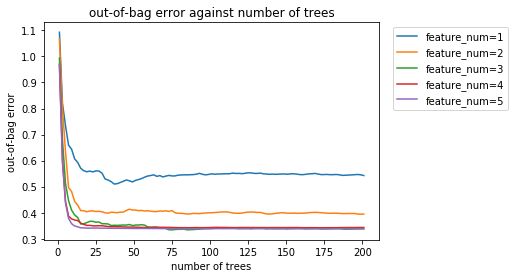

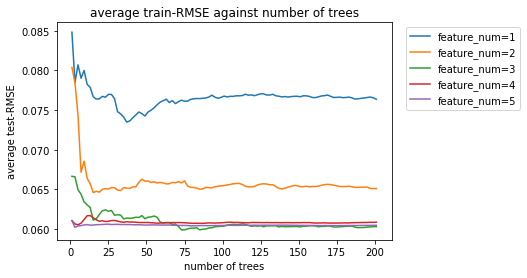

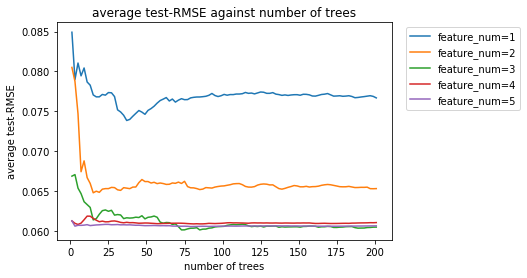

In [28]:
plt.figure()
plt.title('out-of-bag error against number of trees')
plt.xlabel('number of trees')
plt.ylabel('out-of-bag error')
plt.plot(range(1,202, 2), oob)
plt.legend(('feature_num=1','feature_num=2','feature_num=3','feature_num=4','feature_num=5' ),loc='upper right', bbox_to_anchor=(1.4, 1))

plt.figure()
plt.title('average train-RMSE against number of trees')
plt.xlabel('number of trees')
plt.ylabel('average test-RMSE')
plt.plot(range(1,202, 2), avg_RMSE[:,:,0])
plt.legend(('feature_num=1','feature_num=2','feature_num=3','feature_num=4','feature_num=5' ),loc='upper right', bbox_to_anchor=(1.4, 1))


plt.figure()
plt.title('average test-RMSE against number of trees')
plt.xlabel('number of trees')
plt.ylabel('average test-RMSE')
plt.plot(range(1,202, 2), avg_RMSE[:,:,1])
plt.legend(('feature_num=1','feature_num=2','feature_num=3','feature_num=4','feature_num=5' ),loc='upper right', bbox_to_anchor=(1.4, 1))


In [34]:
i,j= np.unravel_index(np.argmin(avg_RMSE[:,:,1]), avg_RMSE[:,:,1].shape)
print('min=',np.min(avg_RMSE[:,:,1]),'i=',i,'j=',j,'min=',avg_RMSE[i,j,1])
print('predicted by RMSE','best_tree_num=',(i)*2+1,'best_feature_num=',j+1)

i,j= np.unravel_index(np.argmin(oob), oob.shape)
print('min=',np.min(oob),'i=',i,'j=',j,'min=',oob[i,j])
print('predicted by oob','best_tree_num=',(i)*2+1,'best_feature_num=',j+1)

min= 0.060157553994374884 i= 42 j= 2 min= 0.060157553994374884
predicted by RMSE best_tree_num= 85 best_feature_num= 3
min= 0.3337272437095302 i= 42 j= 2 min= 0.3337272437095302
predicted by oob best_tree_num= 85 best_feature_num= 3


In [8]:
avg_RMSE1=np.zeros((20,5,2))
oob1=np.zeros((20,5))
for depth in range(1,21):
    for feature_num in range(1,6):
        MSE_train=[]
        MSE_test=[]
        oob_error=[]
        total_train=0
        total_test=0
        for train_index, test_index in kf.split(df):
            X_train= df.loc[train_index]
            y_train= df_y.loc[train_index]
            X_test= df.loc[test_index]
            y_test= df_y.loc[test_index]
            reg = RandomForestRegressor(oob_score=True,n_estimators=85,max_depth=depth, bootstrap=True,max_features=feature_num,random_state=42)
            reg.fit(X_train,y_train)
            pred_train = reg.predict(X_train)
            pred_test = reg.predict(X_test)
            oob_error.append(1 - reg.oob_score_)
            MSE_train.append(mean_squared_error(y_train, pred_train)*len(train_index))
            MSE_test.append(mean_squared_error(y_test, pred_test)*len(test_index))
            total_train=total_train+len(train_index)
            total_test=total_test+len(test_index)
        print('max_depth=',depth,'feature_num=',feature_num,'oob=',mean(oob_error))
        print('max_depth=',depth,'feature_num=',feature_num,'RMSE for test data=',np.sqrt(sum(MSE_train)/total_train))
        print('max_depth=',depth,'feature_num=',feature_num,'RMSE for test data=',np.sqrt(sum(MSE_test)/total_test))
        avg_RMSE1[depth-1,feature_num-1,0]=np.sqrt(sum(MSE_train)/total_train)
        avg_RMSE1[depth-1,feature_num-1,1]=np.sqrt(sum(MSE_test)/total_test)
        oob1[depth-1,feature_num-1]=mean(oob_error)

max_depth= 1 feature_num= 1 oob= 0.9068294787070215
max_depth= 1 feature_num= 1 RMSE for test data= 0.09916174268923277
max_depth= 1 feature_num= 1 RMSE for test data= 0.09917935475347861
max_depth= 1 feature_num= 2 oob= 0.8754814935331545
max_depth= 1 feature_num= 2 RMSE for test data= 0.09744818642794553
max_depth= 1 feature_num= 2 RMSE for test data= 0.09746597588818709
max_depth= 1 feature_num= 3 oob= 0.8722305930297968
max_depth= 1 feature_num= 3 RMSE for test data= 0.09728486184186359
max_depth= 1 feature_num= 3 RMSE for test data= 0.09730268160725403
max_depth= 1 feature_num= 4 oob= 0.8753649858882651
max_depth= 1 feature_num= 4 RMSE for test data= 0.09747019710482921
max_depth= 1 feature_num= 4 RMSE for test data= 0.09748495066257655
max_depth= 1 feature_num= 5 oob= 0.8753649858882651
max_depth= 1 feature_num= 5 RMSE for test data= 0.09747019710482921
max_depth= 1 feature_num= 5 RMSE for test data= 0.09748495066257655
max_depth= 2 feature_num= 1 oob= 0.7853265675245166
max_dept

max_depth= 9 feature_num= 5 oob= 0.014975794311918622
max_depth= 9 feature_num= 5 RMSE for test data= 0.01152468537258003
max_depth= 9 feature_num= 5 RMSE for test data= 0.01274160846647588
max_depth= 10 feature_num= 1 oob= 0.06271645427195544
max_depth= 10 feature_num= 1 RMSE for test data= 0.02198451980728936
max_depth= 10 feature_num= 1 RMSE for test data= 0.025539530695009666
max_depth= 10 feature_num= 2 oob= 0.02454956095404596
max_depth= 10 feature_num= 2 RMSE for test data= 0.013700186837224343
max_depth= 10 feature_num= 2 RMSE for test data= 0.01593756568419284
max_depth= 10 feature_num= 3 oob= 0.016490159484734514
max_depth= 10 feature_num= 3 RMSE for test data= 0.011421883745861276
max_depth= 10 feature_num= 3 RMSE for test data= 0.013147717031713602
max_depth= 10 feature_num= 4 oob= 0.015218796456349182
max_depth= 10 feature_num= 4 RMSE for test data= 0.01101887203155029
max_depth= 10 feature_num= 4 RMSE for test data= 0.012788986955638472
max_depth= 10 feature_num= 5 oob= 0

max_depth= 18 feature_num= 3 oob= 0.01840602024163167
max_depth= 18 feature_num= 3 RMSE for test data= 0.005893926979399674
max_depth= 18 feature_num= 3 RMSE for test data= 0.013957324805905471
max_depth= 18 feature_num= 4 oob= 0.017868727569489463
max_depth= 18 feature_num= 4 RMSE for test data= 0.005837576840646687
max_depth= 18 feature_num= 4 RMSE for test data= 0.013862057511823477
max_depth= 18 feature_num= 5 oob= 0.018134878682553944
max_depth= 18 feature_num= 5 RMSE for test data= 0.005893165263051859
max_depth= 18 feature_num= 5 RMSE for test data= 0.01399244008134796
max_depth= 19 feature_num= 1 oob= 0.03268006931346672
max_depth= 19 feature_num= 1 RMSE for test data= 0.007228642899171711
max_depth= 19 feature_num= 1 RMSE for test data= 0.018011013688646837
max_depth= 19 feature_num= 2 oob= 0.021993920122123912
max_depth= 19 feature_num= 2 RMSE for test data= 0.00600499385994605
max_depth= 19 feature_num= 2 RMSE for test data= 0.015093283431451441
max_depth= 19 feature_num= 3 

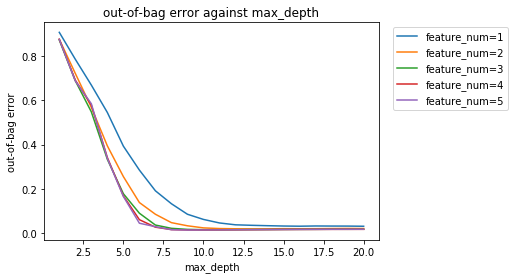

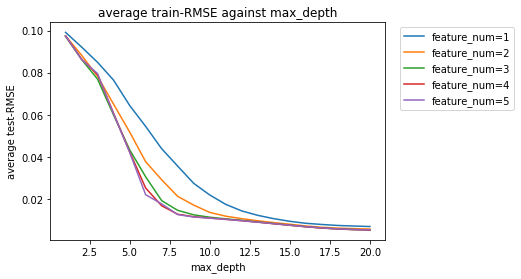

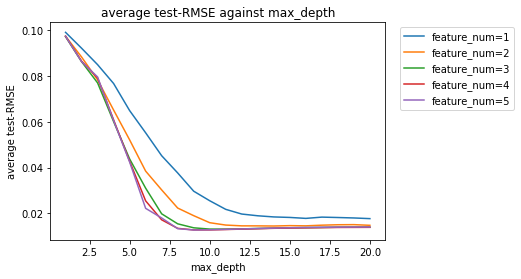

In [10]:
plt.figure()
plt.title('out-of-bag error against max_depth')
plt.xlabel('max_depth')
plt.ylabel('out-of-bag error')
plt.plot(range(1,21), oob1)
plt.legend(('feature_num=1','feature_num=2','feature_num=3','feature_num=4','feature_num=5' ),loc='upper right', bbox_to_anchor=(1.4, 1))

plt.figure()
plt.title('average train-RMSE against max_depth')
plt.xlabel('max_depth')
plt.ylabel('average test-RMSE')
plt.plot(range(1,21), avg_RMSE1[:,:,0])
plt.legend(('feature_num=1','feature_num=2','feature_num=3','feature_num=4','feature_num=5' ),loc='upper right', bbox_to_anchor=(1.4, 1))


plt.figure()
plt.title('average test-RMSE against max_depth')
plt.xlabel('max_depth')
plt.ylabel('average test-RMSE')
plt.plot(range(1,21), avg_RMSE1[:,:,1])
plt.legend(('feature_num=1','feature_num=2','feature_num=3','feature_num=4','feature_num=5' ),loc='upper right', bbox_to_anchor=(1.4, 1))


In [11]:
i,j= np.unravel_index(np.argmin(avg_RMSE1[:,:,1]), avg_RMSE1[:,:,1].shape)
print('min=',np.min(avg_RMSE1[:,:,1]),'i=',i,'j=',j,'min=',avg_RMSE1[i,j,1])
print('predicted by RMSE','best_max_depth=',(i)+1,'best_feature_num=',j+1)

i,j= np.unravel_index(np.argmin(oob1), oob1.shape)
print('min=',np.min(oob1),'i=',i,'j=',j,'min=',oob1[i,j])
print('predicted by oob','best_max_depth=',(i)+1,'best_feature_num=',j+1)

min= 0.01274160846647588 i= 8 j= 4 min= 0.01274160846647588
predicted by RMSE best_max_depth= 9 best_feature_num= 5
min= 0.014975794311918622 i= 8 j= 4 min= 0.014975794311918622
predicted by oob best_max_depth= 9 best_feature_num= 5


In [14]:
df.head()


,Week #,Day of Week,Backup Start Time - Hour of Day,Work-Flow-ID,File Name
0,1,1,1,0,0
1,1,1,1,2,12
2,1,1,1,2,13
3,1,1,1,2,14
4,1,1,1,2,16


In [15]:
forest =  RandomForestRegressor(oob_score=True,n_estimators=85,max_features=5,max_depth=9,random_state=42)
X = df.iloc[:,:].values
y = df_y.iloc[:].values
forest.fit(X, y)
names=['week number', 'day of week', 'hour of day', 'work-flow-ID','file name']
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.3966, 'hour of day'), (0.2766, 'file name'), (0.1998, 'day of week'), (0.1254, 'work-flow-ID'), (0.0016, 'week number')]


In [159]:
import graphviz 
from sklearn import tree
feature_list0=['Week index','Day of Week','Hour of the day','Work-Flow-ID','File Name']

In [161]:
# visualize the random forest

forest1 =  RandomForestRegressor(oob_score=True,n_estimators=85,max_features=5,max_depth=4,random_state=42)

#forest1.set_params(n_estimators=20)
X = df.iloc[:,:].values
y = df_y.iloc[:].values


forest1.fit(X, y)
tree1 = forest1.estimators_[1]
dot_data = tree.export_graphviz(tree1, out_file=None, feature_names=feature_list0, 
                                class_names="charges",   filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('random_forest.png', view=True)

'random_forest.png.pdf'

Text(0.5, 0, 'fitted valuse')

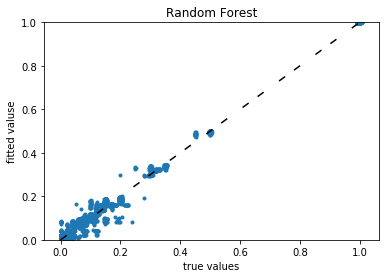

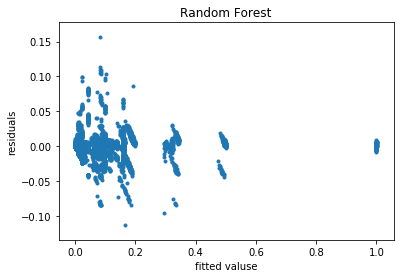

In [152]:
reg = RandomForestRegressor(oob_score=True,n_estimators=85,max_features=5,max_depth=9,random_state=42)
reg.fit(df,df_y)
pred= reg.predict(df)
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.title('Random Forest')
plt.xlabel('true values')
plt.ylabel('fitted valuse')
plt.ylim(0, 1) 

plt.figure()
plt.scatter(pred,df_y-pred,marker='.')
plt.title('Random Forest')
plt.ylabel('residuals')
plt.xlabel('fitted valuse')

# Neural Network

In [40]:
enc = OneHotEncoder()
enc.fit(df)
df_enc=enc.transform(df).toarray()

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [164]:
df_enc.shape

(18588, 63)

In [51]:
hidden_units=[2,5,10,50,100,150,200,250,300,350,400,450,500,550,600]
act_funcs=['relu','logistic','tanh']
avg_RMSE2=np.zeros((15,3,2))
i=0
for hidden_unit in hidden_units:
    j=0
    for act_func in act_funcs:
        print(hidden_unit,act_func)
        RMSE_train=[]
        RMSE_test=[]            
        for train_index, test_index in kf.split(df):
            X_train= df.loc[train_index]
            y_train= df_y.loc[train_index]
            X_test= df.loc[test_index]
            y_test= df_y.loc[test_index]
            reg = MLPRegressor(hidden_layer_sizes=(hidden_unit,),activation=act_func, solver='adam', alpha=1e-5, random_state=42)
            reg.fit(enc.transform(X_train).toarray(),y_train)
            pred_train = reg.predict(enc.transform(X_train))
            pred_test = reg.predict(enc.transform(X_test))
            RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
            RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
            
        print('hidden_unit=',hidden_unit,'act_func=',act_func,'RMSE for train data=',mean(RMSE_train))
        print('hidden_unit=',hidden_unit,'act_func=',act_func,'RMSE for test data=',mean(RMSE_test))
        print('i=',i,'j=',j)
        avg_RMSE2[i,j,0]=mean(RMSE_train)
        avg_RMSE2[i,j,1]=mean(RMSE_test)
        j=j+1
    i=i+1

2 relu
hidden_unit= 2 act_func= relu RMSE for train data= 0.08867341536592956
hidden_unit= 2 act_func= relu RMSE for test data= 0.08873143748450278
i= 0 j= 0
2 logistic
hidden_unit= 2 act_func= logistic RMSE for train data= 0.08816555782154716
hidden_unit= 2 act_func= logistic RMSE for test data= 0.08808616267653906
i= 0 j= 1
2 tanh
hidden_unit= 2 act_func= tanh RMSE for train data= 0.08826216979519631
hidden_unit= 2 act_func= tanh RMSE for test data= 0.08826767331772921
i= 0 j= 2
5 relu
hidden_unit= 5 act_func= relu RMSE for train data= 0.08832406331592722
hidden_unit= 5 act_func= relu RMSE for test data= 0.08852202011967039
i= 1 j= 0
5 logistic
hidden_unit= 5 act_func= logistic RMSE for train data= 0.08801362710842354
hidden_unit= 5 act_func= logistic RMSE for test data= 0.08803150032150933
i= 1 j= 1
5 tanh
hidden_unit= 5 act_func= tanh RMSE for train data= 0.08595175150570278
hidden_unit= 5 act_func= tanh RMSE for test data= 0.08612965099651496
i= 1 j= 2
10 relu
hidden_unit= 10 act_

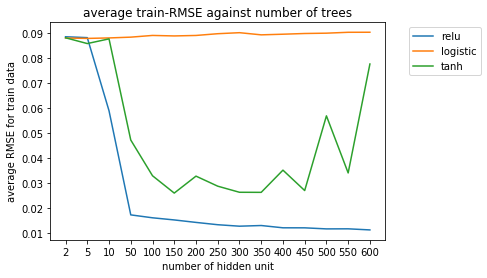

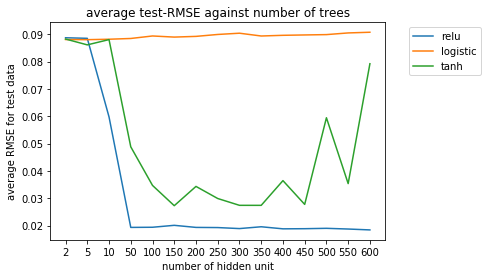

In [52]:
plt.figure()
plt.title('average train-RMSE against number of trees')
plt.xlabel('number of hidden unit')
plt.xticks([j for j in range(15)],hidden_units)  
plt.ylabel('average RMSE for train data')
plt.plot(range(15), avg_RMSE2[:,:,0])
plt.legend(('relu','logistic','tanh' ),loc='upper right', bbox_to_anchor=(1.3, 1))



plt.figure()
plt.title('average test-RMSE against number of trees')
plt.xlabel('number of hidden unit')
plt.xticks([j for j in range(15)],hidden_units)  
plt.ylabel('average RMSE for test data')
plt.plot(range(15), avg_RMSE2[:,:,1])
plt.legend(('relu','logistic','tanh' ),loc='upper right', bbox_to_anchor=(1.3, 1))


In [53]:
i,j= np.unravel_index(np.argmin(avg_RMSE2[:,:,1]), avg_RMSE2[:,:,1].shape)
print('min=',np.min(avg_RMSE2[:,:,1]),'i=',i,'j=',j,'min=',avg_RMSE2[i,j,1])
print('best_hidden_units=',hidden_units[i],'best_act_funcs=',act_funcs[j])

min= 0.01844251478903183 i= 14 j= 0 min= 0.01844251478903183
best_hidden_units= 600 best_act_funcs= relu


Text(0.5, 0, 'fitted valuse')

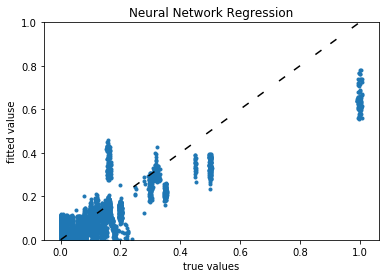

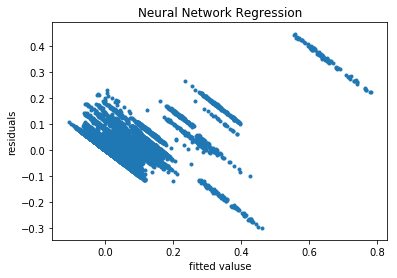

In [153]:
reg =  MLPRegressor(hidden_layer_sizes=(600,),activation='relu', solver='adam', alpha=1e-5, random_state=42)
reg.fit(df,df_y)
pred= reg.predict(df)
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.title('Neural Network Regression')
plt.xlabel('true values')
plt.ylabel('fitted valuse')
plt.ylim(0, 1) 

plt.figure()
plt.scatter(pred,df_y-pred,marker='.')
plt.title('Neural Network Regression')
plt.ylabel('residuals')
plt.xlabel('fitted valuse')

# Separate by workflows

In [ ]:
#Linear Regression

In [128]:
wf_RMSE=np.zeros((5,2))
wf_len=np.zeros(5)
for ID, wfGroup in df.groupby('Work-Flow-ID'):
    print('worlflow=',ID,'len',len(wfGroup))
    wf_len[int(ID)]=len(wfGroup)
    RMSE_train=[]
    RMSE_test=[]
    for train_index, test_index in kf.split(wfGroup):
        X_train= df.loc[wfGroup.index[train_index]]
        y_train= df_y.loc[wfGroup.index[train_index]]
        X_test= df.loc[wfGroup.index[test_index]]
        y_test= df_y.loc[wfGroup.index[test_index]]
        reg = LinearRegression().fit(X_train, y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
        RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
    print('worlflow=',ID,'RMSE for train data=',mean(RMSE_train))
    print('worlflow=',ID,'RMSE for test data=',mean(RMSE_test))
    wf_RMSE[int(ID),0]=mean(RMSE_train)
    wf_RMSE[int(ID),1]=mean(RMSE_test)
    
print('total RMSE=',np.sum(np.dot(wf_RMSE[:,1],wf_len))/np.sum(wf_len))

worlflow= 0 len 3687
worlflow= 0 RMSE for train data= 0.03583586842718061
worlflow= 0 RMSE for test data= 0.03583754998969409
worlflow= 1 len 3600
worlflow= 1 RMSE for train data= 0.14875059707912236
worlflow= 1 RMSE for test data= 0.14787048998213032
worlflow= 2 len 3741
worlflow= 2 RMSE for train data= 0.042912931601067295
worlflow= 2 RMSE for test data= 0.04291128836396863
worlflow= 3 len 3780
worlflow= 3 RMSE for train data= 0.007243776429272823
worlflow= 3 RMSE for test data= 0.0072076298710883205
worlflow= 4 len 3780
worlflow= 4 RMSE for train data= 0.08591484291138712
worlflow= 4 RMSE for test data= 0.08582592384986659
total RMSE= 0.06330238721661757


In [ ]:
# Polynomial function

In [11]:
avg_RMSE3=np.zeros((11,2))
wf_RMSE=np.zeros((11,5,2))
for de in range(1,12):    
    wf_len=np.zeros(5)
    for ID, wfGroup in df.groupby('Work-Flow-ID'):
        print('worlflow=',ID,'len',len(wfGroup))
        wf_len[int(ID)]=len(wfGroup)
        RMSE_train=[]
        RMSE_test=[]
        for train_index, test_index in kf.split(wfGroup):
            X_train= df.loc[wfGroup.index[train_index]]
            y_train= df_y.loc[wfGroup.index[train_index]]
            X_test= df.loc[wfGroup.index[test_index]]
            y_test= df_y.loc[wfGroup.index[test_index]]
            poly = PolynomialFeatures(degree=de)
            poly.fit(X_train)
            X_train_new=poly.transform(X_train)
            X_test_new=poly.transform(X_test)
            reg = LinearRegression().fit(X_train_new, y_train)
            pred_train = reg.predict(X_train_new)
            pred_test = reg.predict(X_test_new)
            RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
            RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
        wf_RMSE[de-1,int(ID),0]=mean(RMSE_train)
        wf_RMSE[de-1,int(ID),1]=mean(RMSE_test)
    print('degree=',de,'total RMSE=',np.sum(np.dot(wf_RMSE[de-1,:,0],wf_len))/np.sum(wf_len))
    print('degree=',de,'total RMSE=',np.sum(np.dot(wf_RMSE[de-1,:,1],wf_len))/np.sum(wf_len))
    avg_RMSE3[de-1,0]=np.sum(np.dot(wf_RMSE[de-1,:,0],wf_len))/np.sum(wf_len)
    avg_RMSE3[de-1,1]=np.sum(np.dot(wf_RMSE[de-1,:,1],wf_len))/np.sum(wf_len)

worlflow= 0 len 3687
worlflow= 1 len 3600
worlflow= 2 len 3741
worlflow= 3 len 3780
worlflow= 4 len 3780
degree= 1 total RMSE= 0.06349827063713916
degree= 1 total RMSE= 0.06330238721661756
worlflow= 0 len 3687
worlflow= 1 len 3600
worlflow= 2 len 3741
worlflow= 3 len 3780
worlflow= 4 len 3780
degree= 2 total RMSE= 0.05410423631815546
degree= 2 total RMSE= 0.05413893106625749
worlflow= 0 len 3687
worlflow= 1 len 3600
worlflow= 2 len 3741
worlflow= 3 len 3780
worlflow= 4 len 3780
degree= 3 total RMSE= 0.05047065231461508
degree= 3 total RMSE= 0.05072116192225409
worlflow= 0 len 3687
worlflow= 1 len 3600
worlflow= 2 len 3741
worlflow= 3 len 3780
worlflow= 4 len 3780
degree= 4 total RMSE= 0.04183702587365208
degree= 4 total RMSE= 0.04256957498036803
worlflow= 0 len 3687
worlflow= 1 len 3600
worlflow= 2 len 3741
worlflow= 3 len 3780
worlflow= 4 len 3780
degree= 5 total RMSE= 0.031690465894642084
degree= 5 total RMSE= 0.03295049035723785
worlflow= 0 len 3687
worlflow= 1 len 3600
worlflow= 2 

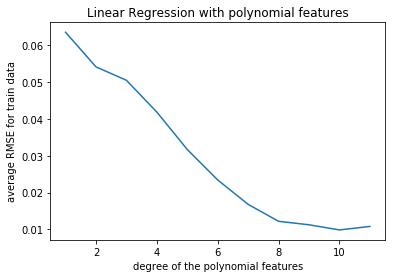

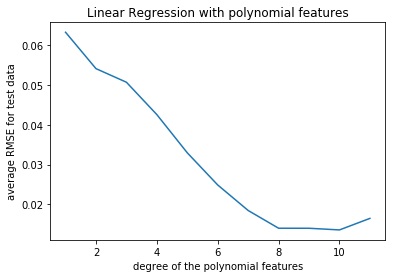

In [143]:
plt.figure()
plt.title('Linear Regression with polynomial features')
plt.xlabel('degree of the polynomial features')
plt.ylabel('average RMSE for train data')
plt.plot(range(1,12), avg_RMSE3[:,0])



plt.figure()
plt.title('Linear Regression with polynomial features')
plt.xlabel('degree of the polynomial features')
plt.ylabel('average RMSE for test data')
plt.plot(range(1,12), avg_RMSE3[:,1])

In [154]:
pred = np.zeros(len(df))
for ID, wfGroup in df.groupby('Work-Flow-ID'):
    print('worlflow=',ID,'len',len(wfGroup))
    wf_len[int(ID)]=len(wfGroup)    
    X_train= df.loc[wfGroup.index]
    y_train= df_y.loc[wfGroup.index]
    poly = PolynomialFeatures(degree=10)
    poly.fit(X_train)
    X_train_new=poly.transform(X_train)
    reg = LinearRegression().fit(X_train_new, y_train)
    pred[wfGroup.index] = reg.predict(X_train_new)

worlflow= 0 len 3687
worlflow= 1 len 3600
worlflow= 2 len 3741
worlflow= 3 len 3780
worlflow= 4 len 3780


Text(0.5, 0, 'fitted valuse')

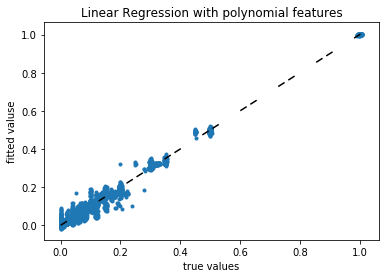

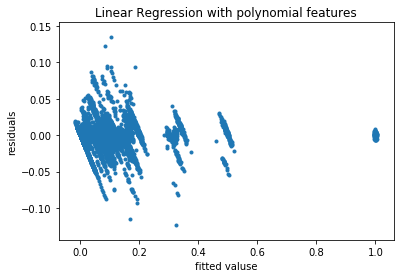

In [155]:
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.title('Linear Regression with polynomial features')
plt.xlabel('true values')
plt.ylabel('fitted valuse')
 

plt.figure()
plt.scatter(pred,df_y-pred, marker='.')
plt.title('Linear Regression with polynomial features')
plt.ylabel('residuals')
plt.xlabel('fitted valuse')

# K-nearest neighbor regression

In [66]:

avg_RMSE5=np.zeros((50,2))
i=0
for n_neighbor in range(1,51):
    RMSE_train=[]
    RMSE_test=[]          
    for train_index, test_index in kf.split(df):
        X_train= df.loc[train_index]
        y_train= df_y.loc[train_index]
        X_test= df.loc[test_index]
        y_test= df_y.loc[test_index]
        reg = KNeighborsRegressor(n_neighbors=n_neighbor)
        reg.fit(X_train,y_train)
        pred_train = reg.predict(X_train)
        pred_test = reg.predict(X_test)
        RMSE_train.append(np.sqrt(mean_squared_error(y_train, pred_train)))
        RMSE_test.append(np.sqrt(mean_squared_error(y_test, pred_test)))
            
    print('n_neighbor=',n_neighbor,'RMSE for train data=',mean(RMSE_train))
    print('n_neighbor=',n_neighbor,'RMSE for test data=',mean(RMSE_test))
    avg_RMSE5[i,0]=mean(RMSE_train)
    avg_RMSE5[i,1]=mean(RMSE_test)
    i=i+1

n_neighbor= 1 RMSE for train data= 0.0
n_neighbor= 1 RMSE for test data= 0.06090013826032442
n_neighbor= 2 RMSE for train data= 0.029879513379720595
n_neighbor= 2 RMSE for test data= 0.04406672204117755
n_neighbor= 3 RMSE for train data= 0.029327946368689694
n_neighbor= 3 RMSE for test data= 0.03767965914742971
n_neighbor= 4 RMSE for train data= 0.0278513200382908
n_neighbor= 4 RMSE for test data= 0.033742573342563184
n_neighbor= 5 RMSE for train data= 0.02718852358095923
n_neighbor= 5 RMSE for test data= 0.03444853884572993
n_neighbor= 6 RMSE for train data= 0.029462638732575243
n_neighbor= 6 RMSE for test data= 0.03913302158406965
n_neighbor= 7 RMSE for train data= 0.03372111146306725
n_neighbor= 7 RMSE for test data= 0.04323276112214184
n_neighbor= 8 RMSE for train data= 0.03744307508225057
n_neighbor= 8 RMSE for test data= 0.045123999304617454
n_neighbor= 9 RMSE for train data= 0.03990948429267663
n_neighbor= 9 RMSE for test data= 0.04710736494844709
n_neighbor= 10 RMSE for train d

In [68]:

print('min=',np.min(avg_RMSE5[:,1]),'i=',np.argmin(avg_RMSE5[:,1]),avg_RMSE5[np.argmin(avg_RMSE5[:,1]),1])
print('best_n_neighbor=',range(1,51)[np.argmin(avg_RMSE5[:,1])])

min= 0.033742573342563184 i= 3 0.033742573342563184
best_n_neighbor= 4


Text(0.5, 0, 'fitted valuse')

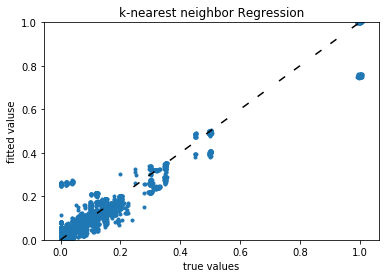

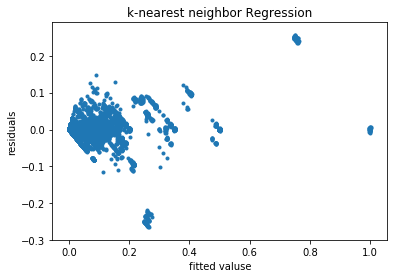

In [156]:
reg =  KNeighborsRegressor(n_neighbors=4)
reg.fit(df,df_y)
pred= reg.predict(df)
plt.figure()
plt.scatter(df_y, pred,marker='.')
plt.plot(df_y,df_y,dashes=[5, 25],color='black')
plt.title('k-nearest neighbor Regression')
plt.xlabel('true values')
plt.ylabel('fitted valuse')
plt.ylim(0, 1) 

plt.figure()
plt.scatter(pred,df_y-pred,marker='.')
plt.title('k-nearest neighbor Regression')
plt.ylabel('residuals')
plt.xlabel('fitted valuse')